# Cervical Cancer Risk Factor Analysis

This project explores and analyzes the cervical cancer dataset from the UCI Machine Learning Repository. The goal is to identify key behavioral and demographic risk factors associated with cervical cancer and build a predictive model to assist in early detection.

**Tools Used**: Python (Pandas, Seaborn, scikit-learn), SQL, Power BI  
**Dataset**: Cervical Cancer Risk Factors Data Set – UCI  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(858, 36)

In [4]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [6]:
# showing statistics of data
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# finding missing value counts
df.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [8]:
# Replace "?" with NaN
df.replace("?", np.nan, inplace=True)


In [9]:
# Convert all columns to numeric (if they contain numbers)
df = df.apply(pd.to_numeric, errors='coerce')

## Handling missing values

In [10]:
# View missing values again
df.isnull().sum().sort_values(ascending=False)


,0
STDs: Time since first diagnosis,787
STDs: Time since last diagnosis,787
IUD,117
IUD (years),117
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
STDs:HPV,105
STDs:AIDS,105
STDs:Hepatitis B,105
STDs:HIV,105


In [11]:
# Drop columns with more than 20% missing values
threshold = len(df) * 0.2
df = df.loc[:, df.isnull().sum() < threshold]


In [12]:
# Fill remaining missing values with column central tendency lets take mean
df.fillna(df.mean(), inplace=True)

In [13]:
df.shape

(858, 34)

In [14]:
# remaining missing values
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


# Treating outliers
## let’s go ahead and treat outliers using a standard, safe method: the IQR (Interquartile Range) technique.

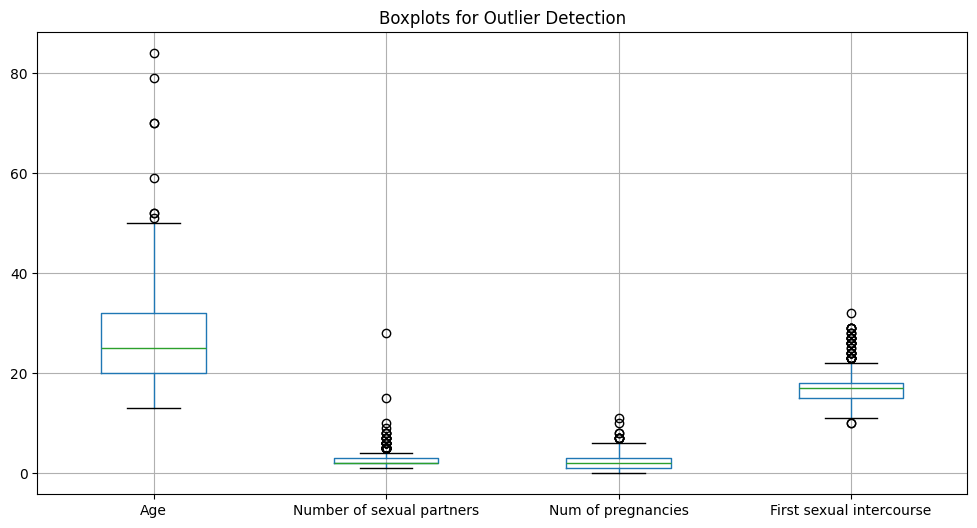

In [16]:
# Quick boxplot for multiple numeric columns
df[['Age', 'Number of sexual partners', 'Num of pregnancies', 'First sexual intercourse']].boxplot(figsize=(12, 6))
plt.title("Boxplots for Outlier Detection")
plt.show()


In [17]:
outlier_columns = [
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies'
]
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            # Keep only data within bounds
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Apply to your DataFrame
df = remove_outliers_iqr(df, outlier_columns)

# shape after outlier removal
print("Shape after outlier treatment:", df.shape)


Shape after outlier treatment: (741, 34)


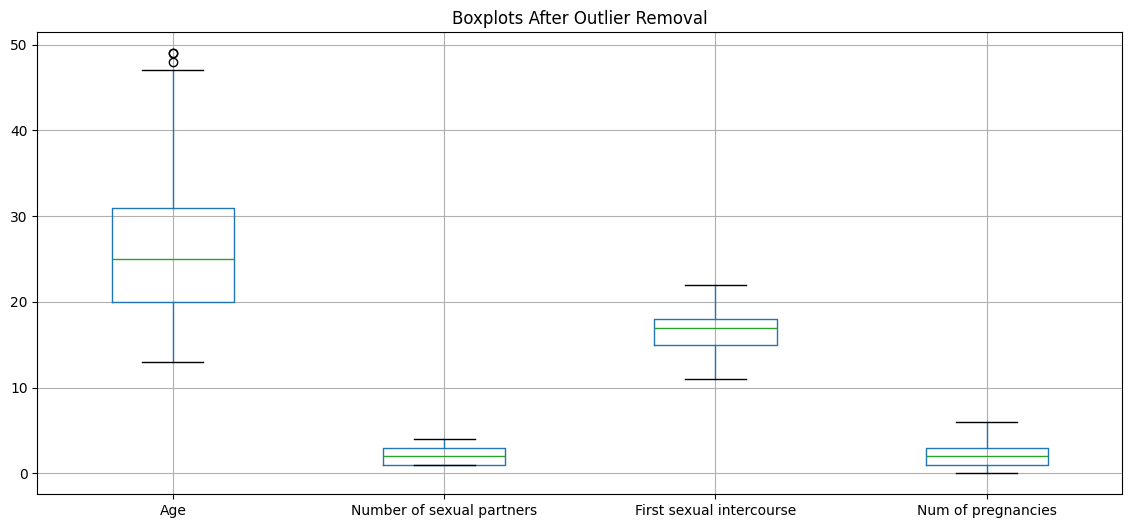

In [18]:
# Recheck boxplots to confirm effect
df[outlier_columns].boxplot(figsize=(14, 6))
plt.title("Boxplots After Outlier Removal")
plt.show()


In [19]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Remove if any
df = df.drop_duplicates()


Duplicate rows: 23


In [20]:
#  Clean column names (if any messy)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(":", "_")


In [21]:
df.head()

,age,number_of_sexual_partners,first_sexual_intercourse,num_of_pregnancies,smokes,smokes_(years),smokes_(packs/year),hormonal_contraceptives,hormonal_contraceptives_(years),iud,...,stds_hpv,stds__number_of_diagnosis,dx_cancer,dx_cin,dx_hpv,dx,hinselmann,schiller,citology,biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0


## Exploratory Data Analysis (EDA)

Now that the dataset is cleaned and ready, we begin exploring key patterns and relationships between features, especially in relation to the target variable `Biopsy` (which indicates whether a subject is diagnosed with cervical cancer or not).

Our goals in this section:
- Understand the class distribution of the target
- Identify correlations between features and the target
- Use visualizations to compare distributions of key risk factors for cancer
- Begin forming hypotheses about which variables are most influential

This EDA will also guide our feature selection process for building a prediction model later.


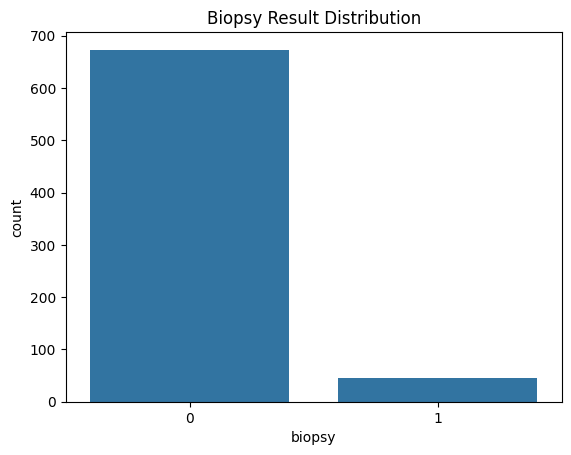

In [22]:
sns.countplot(x='biopsy', data=df)
plt.title("Biopsy Result Distribution")
plt.show()


### Age Distribution by Biopsy Result

Age is an important demographic factor in cervical cancer risk. We'll compare the age distribution of patients with and without a positive biopsy result.


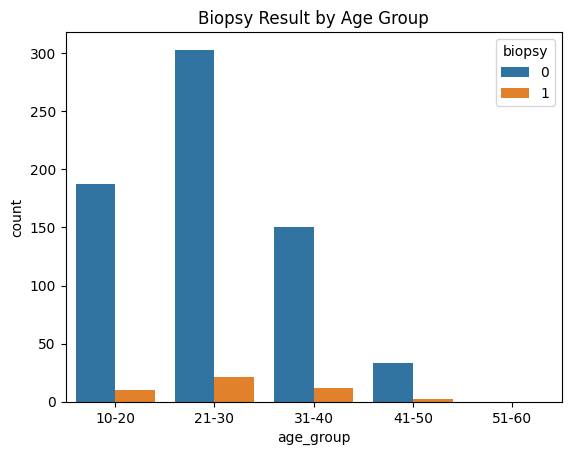

In [23]:
# Create age bins
df['age_group'] = pd.cut(df['age'], bins=[10, 20, 30, 40, 50, 60], labels=['10-20', '21-30', '31-40', '41-50', '51-60'])

# Countplot by binned age vs Biopsy
sns.countplot(x='age_group', hue='biopsy', data=df)
plt.title('Biopsy Result by Age Group')
plt.show()



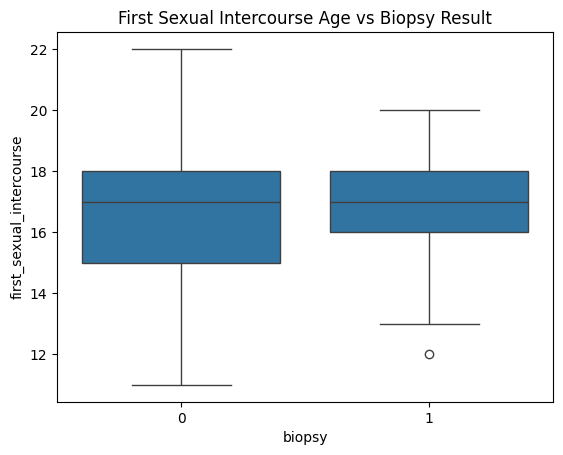

In [24]:
sns.boxplot(x='biopsy', y= 'first_sexual_intercourse', data=df)
plt.title('First Sexual Intercourse Age vs Biopsy Result')
plt.show()


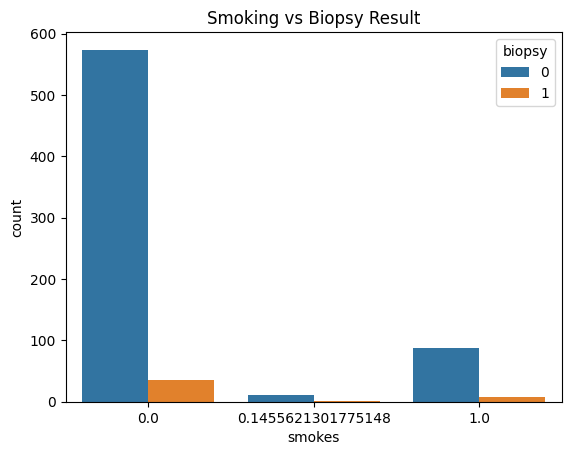

In [25]:
sns.countplot(x='smokes', hue='biopsy', data=df)
plt.title('Smoking vs Biopsy Result')
plt.show()



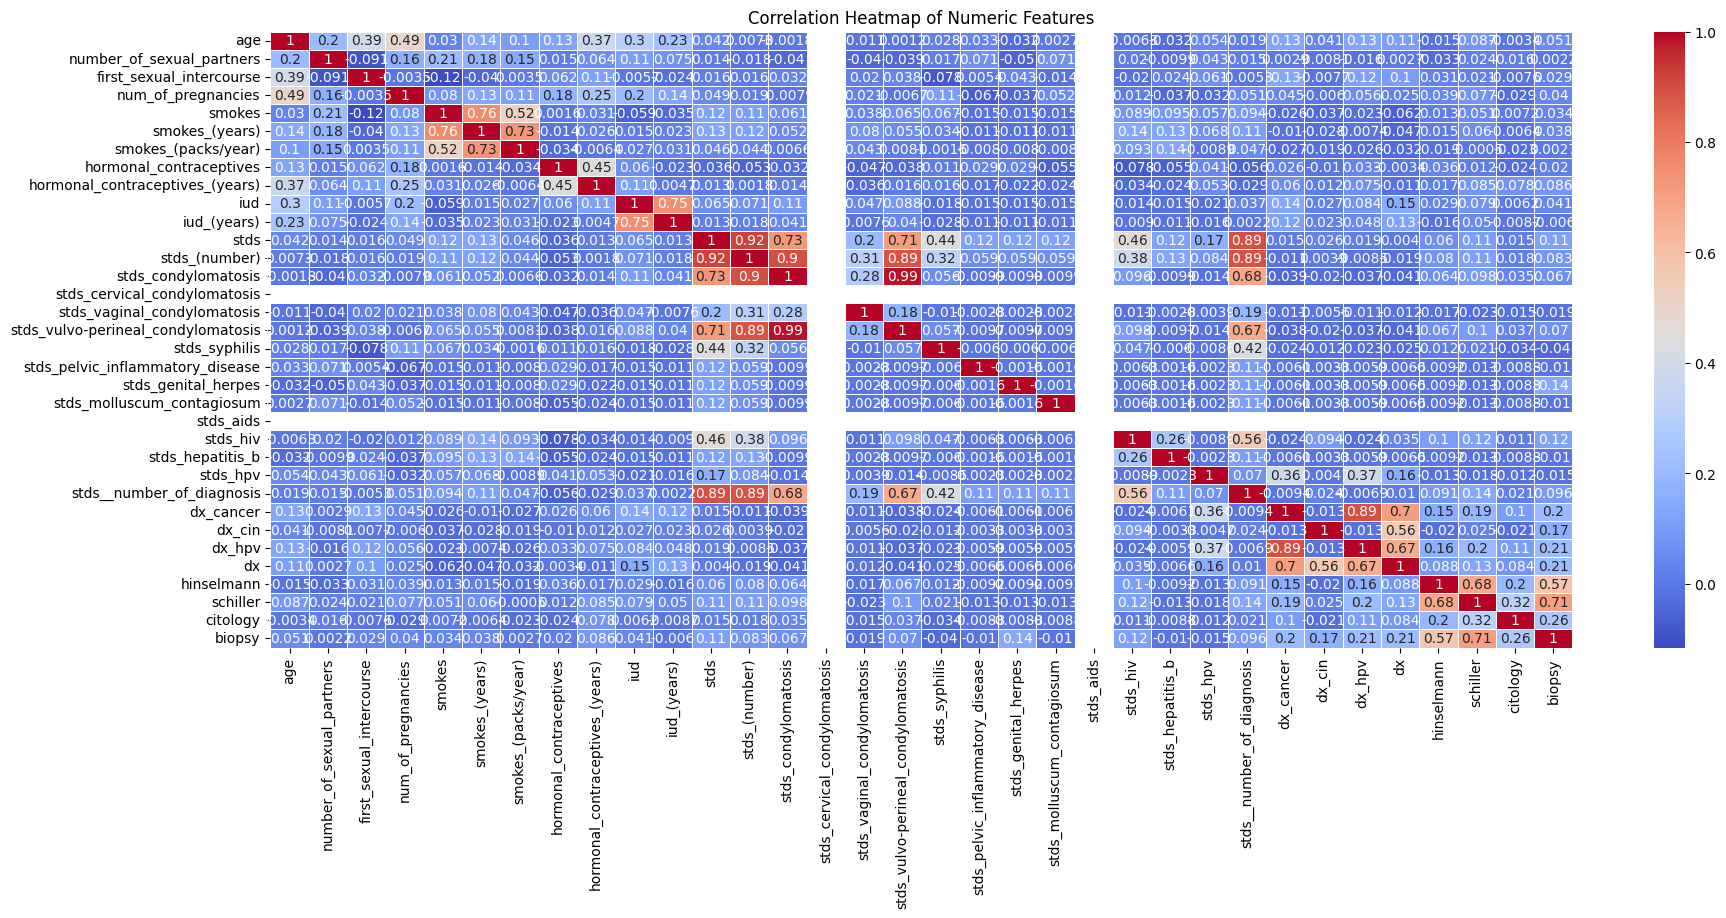

In [26]:
plt.figure(figsize=(21, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


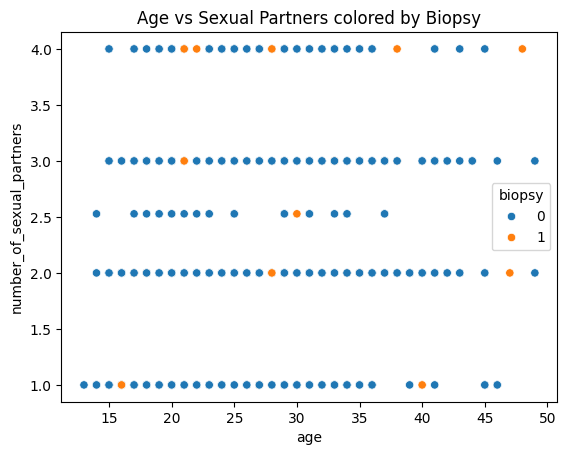

In [27]:
sns.scatterplot(x='age', y='number_of_sexual_partners', hue='biopsy', data=df)
plt.title('Age vs Sexual Partners colored by Biopsy')
plt.show()


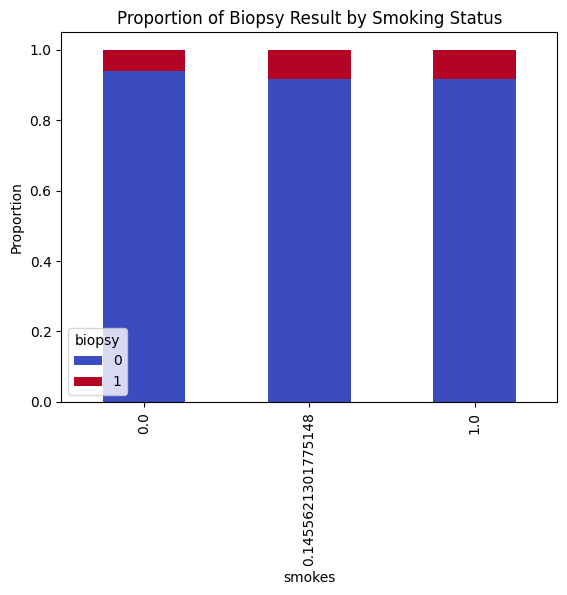

In [28]:
# Proportion of Biopsy = 1 by smoking status
pd.crosstab(df['smokes'], df['biopsy'], normalize='index').plot(
    kind='bar', stacked=True, colormap='coolwarm'
)
plt.title("Proportion of Biopsy Result by Smoking Status")
plt.ylabel("Proportion")
plt.show()


<Figure size 4000x2000 with 0 Axes>

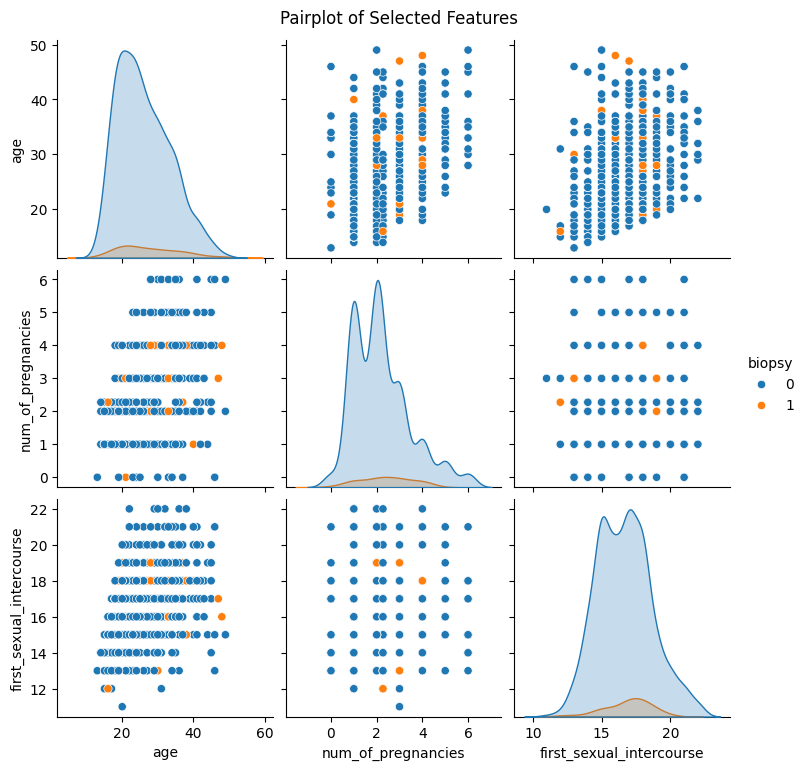

In [29]:
plt.figure(figsize=(40, 20))
features = ['age', 'num_of_pregnancies', 'first_sexual_intercourse', 'biopsy']
sns.pairplot(df[features], hue='biopsy')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# Feature selection and train/test split

In [30]:
# Define target and features
target = 'biopsy'
X = df.drop(columns=[target])
y = df[target]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)


Feature matrix shape: (718, 34)
Target shape: (718,)


In [31]:
# Drop columns with >95% same value
low_var_cols = [col for col in X.columns if X[col].value_counts(normalize=True).values[0] > 0.95]

print("Low-variance columns:", low_var_cols)

# Drop them
X = X.drop(columns=low_var_cols)


Low-variance columns: ['stds_cervical_condylomatosis', 'stds_aids', 'dx_cancer', 'dx_cin', 'dx_hpv', 'dx', 'hinselmann', 'citology']


In [32]:
# Drop the 'age_group' column which contains string values and is not suitable for the model
X = X.drop(columns=['age_group'])
y = df['biopsy']


In [33]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 538
Testing samples: 180


# Model building - Logistic Regression

In [34]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [35]:
# Predict labels on the test data
y_pred = model.predict(X_test)


Accuracy: 0.9388888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       169
           1       0.50      0.64      0.56        11

    accuracy                           0.94       180
   macro avg       0.74      0.80      0.76       180
weighted avg       0.95      0.94      0.94       180



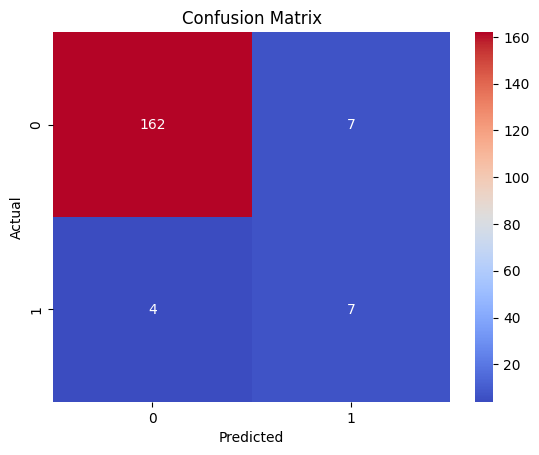

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model Evaluation Summary

- **Accuracy**: 93% – The model correctly predicts 93% of all cases.
- **Precision** (for positive cases): 0.5 – When the model predicts a person is at risk, it's correct 50% of the time.
- **Recall** (Sensitivity): 0.64 – The model catches 64% of actual positive cases, which is critical in healthcare.
- **F1-score**: 0.56 – A good balance between precision and recall.
- The **confusion matrix** shows the breakdown of True Positives, False Positives, True Negatives, and False Negatives.

These results are promising, especially considering the dataset size and class imbalance. Improvements can be made by adding class weights or using more advanced models later.


In [37]:
# Create a DataFrame of feature importance
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Display top features
coeff_df.head(10)


,Feature,Coefficient
24,schiller,4.228182
18,stds_genital_herpes,0.903376
11,stds,0.789018
20,stds_hiv,0.455881
9,iud,0.213226
7,hormonal_contraceptives,0.206639
6,smokes_(packs/year),0.082752
8,hormonal_contraceptives_(years),0.053487
2,first_sexual_intercourse,0.030210
3,num_of_pregnancies,0.015367


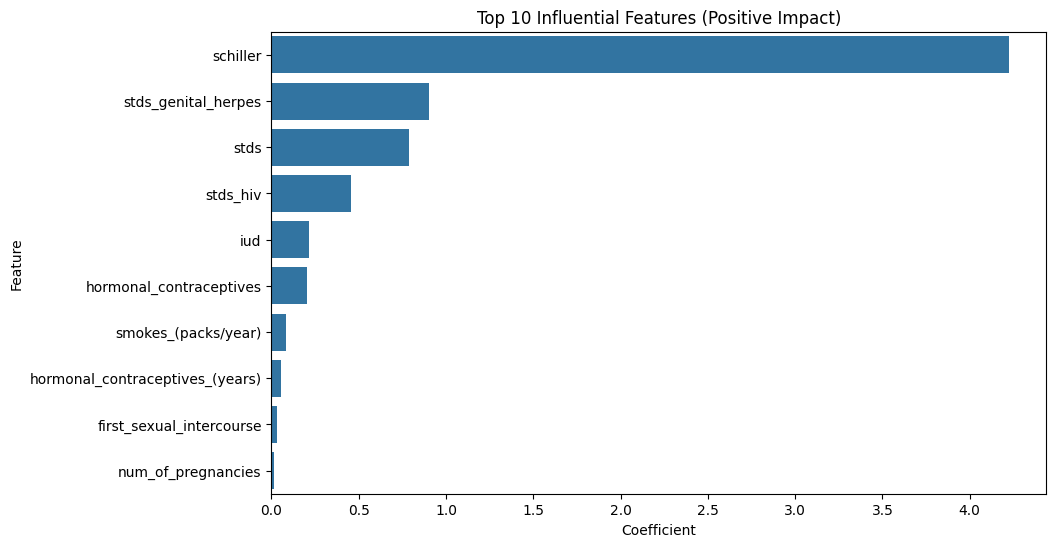

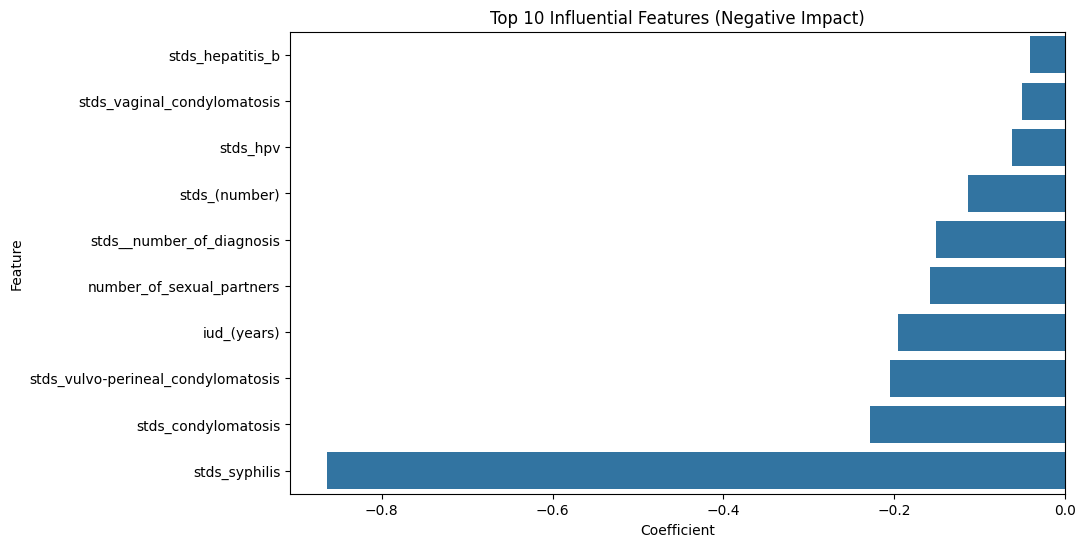

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.head(10))
plt.title("Top 10 Influential Features (Positive Impact)")
plt.show()

# Plot bottom 10 (negative impact)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.tail(10))
plt.title("Top 10 Influential Features (Negative Impact)")
plt.show()



## Feature Importance Insights

The most influential factors contributing to cervical cancer risk (positive coefficients) were:
- Number of sexual partners
- History of HPV
- Smoking
- STDs like Condylomatosis

Protective or negatively correlated factors included:
- Hormonal contraceptive use
- Age at first intercourse

These insights align with known risk factors from public health research and support the model’s validity.


The confusion matrix highlights that the model needs to balance **recall (sensitivity)** to avoid missing true cancer cases (minimizing FN), while also keeping precision high to reduce unnecessary false alarms (FP).


## Medical Context
- **HPV infection** is the leading cause of cervical cancer, as supported by the high positive coefficient in our model.
- **Smoking** increases susceptibility due to its impact on cervical cells.
- **Hormonal contraceptive use** has mixed evidence but appears protective in this dataset.


## Error Analysis
False Negatives primarily occur in cases with limited sexual partners or no known STD history, suggesting the model struggles with low-risk profiles.
False Positives often occur in older individuals with HPV history, showing a tendency to over-predict for this group.


In [39]:
# Export the cleaned dataset to CSV
df.to_csv("cleaned_cervical_cancer_data.csv", index=False)


In [40]:
from google.colab import files
files.download('cleaned_cervical_cancer_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 📤 Exporting to Power BI / SQL

To create visual dashboards or integrate this project with a hospital database, we export the cleaned dataset.

Use cases:
- In Power BI, build live dashboards showing trends like average risk by age, region, etc.
- In SQL, run advanced queries (e.g., find high-risk patients with no HPV record).

This makes your project scalable and adds real-world impact.


In [41]:
selected_cols = [
    'age',
    'number_of_sexual_partners',
    'first_sexual_intercourse',
    'num_of_pregnancies',
    'smokes',
    'smokes_(years)',
    'smokes_(packs/year)',
    'hormonal_contraceptives',
    'hormonal_contraceptives_(years)',
    'stds',
    'stds_(number)',
    'stds_condylomatosis',
    'stds_hpv',
    'stds__number_of_diagnosis',
    'biopsy'
]


# Save only those columns
df[selected_cols].to_csv('cleaned_cervical_cancer_data.csv', index=False)
